In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df_all = pd.read_csv(
    "pv_cleaned_all.csv",
    parse_dates=["timestamp"]
)

df_all




,source_file,pv_power_w,timestamp,interval_minutes,is_generation,hour,day,month,weekday,pv_energy_kwh
0,26_measurements.csv,0.0,2015-02-28 23:00:00+00:00,NaN,False,23,2015-02-28,2,5,NaN
1,26_measurements.csv,0.0,2015-03-01 00:00:00+00:00,60.0,False,0,2015-03-01,3,6,0.0
2,26_measurements.csv,0.0,2015-03-01 01:00:00+00:00,60.0,False,1,2015-03-01,3,6,0.0
3,26_measurements.csv,0.0,2015-03-01 02:00:00+00:00,60.0,False,2,2015-03-01,3,6,0.0
4,26_measurements.csv,0.0,2015-03-01 03:00:00+00:00,60.0,False,3,2015-03-01,3,6,0.0
...,...,...,...,...,...,...,...,...,...,...
284035,28_measurements.csv,0.0,2025-12-17 18:00:00+00:00,60.0,False,18,2025-12-17,12,2,0.0
284036,28_measurements.csv,0.0,2025-12-17 19:00:00+00:00,60.0,False,19,2025-12-17,12,2,0.0
284037,28_measurements.csv,0.0,2025-12-17 20:00:00+00:00,60.0,False,20,2025-12-17,12,2,0.0
284038,28_measurements.csv,0.0,2025-12-17 21:00:00+00:00,60.0,False,21,2025-12-17,12,2,0.0


# Wie verändert sich die PV-Leistung im Tagesverlauf?

### Ziel der Analyse:
Ziel der Analyse ist es, den typischen Tagesverlauf der Photovoltaikanlage zu identifizieren. Dabei wird die erzeugte Leistung in Abhängigkeit von der Tageszeit betrachtet, um zu untersuchen, ob ein charakteristisches Muster erkennbar ist.

### Vorgang:
Für die Datenanalyse werden folgende Variablen aus dem Datensatz verwendet: Zeitstempel der Messung, PV-Leistung in Watt, und die Stunde des Tages. Als nächstes werden die Daten nach der Stunde des Tages gruppiert, und für jede einzelne Stunde der Mittelwert berechnet und anschließend Visualisiert.

Text(0.5, 1.0, 'Mittlerer Tagesverlauf der PV-Leistung')

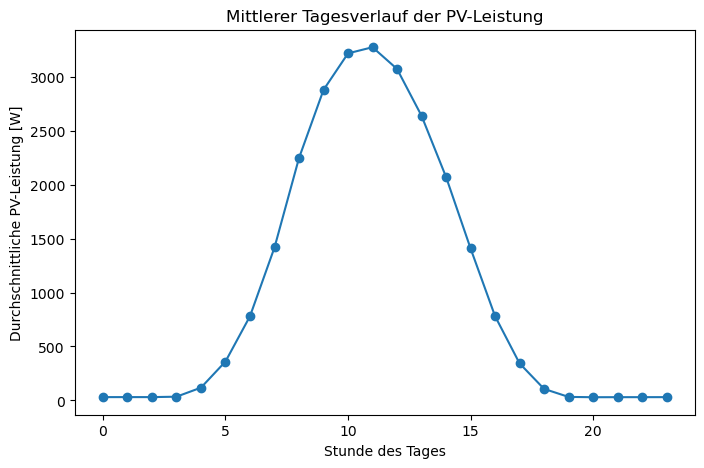

In [23]:
pv_hourly_mean=(
    df_all.groupby('hour')['pv_power_w'].mean().reset_index()
)
pv_hourly_mean

plt.figure(figsize=(8, 5))
plt.plot(pv_hourly_mean['hour'],pv_hourly_mean['pv_power_w'], marker="o")

plt.xlabel("Stunde des Tages")
plt.ylabel("Durchschnittliche PV-Leistung [W]")
plt.title("Mittlerer Tagesverlauf der PV-Leistung")


# Gibt es Saisonale Unterschiede in der PV- Erzeugung?


### Ziel der Analyse:

Ziel dieser Analyse ist es, saisonale Unterschiede in der Photovoltaik-Energieerzeugung zu untersuchen. Dabei soll analysiert werden, in welchem Ausmaß sich die Erträge zwischen den Jahreszeiten unterscheiden und ob die Sommermonate, wie aufgrund der höheren Sonneneinstrahlung zu erwarten, deutlich höhere Energieerträge liefern

### Vorgang:

Die Monate werden zu ihren jeweiligen Jahreszeiten zugeordnet. Anschließend wird für jede Jahreszeit ihren durchschnittlichen Wert der Photovoltaik-Anlage bestimmt. Auf Basis dieser Mittelwerte werden dann die saisonalen Unterschiede miteinander verglichen

Text(0.5, 0, 'Jahreszeiten')

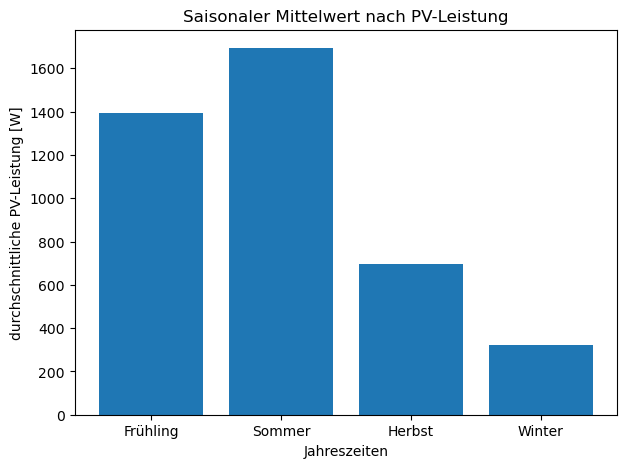

In [ ]:
#Zuweisung der Monate zu ihrer Jahreszeit
df_fruehling= df_all[df_all["month"].isin([3,4,5])]
df_summer = df_all[df_all["month"].isin([6,7,8])]
df_autumm= df_all[df_all["month"].isin([9,10,11])]
df_winter = df_all[df_all["month"].isin([12,1,2])]

#berechnung der Mittelwerte
means = {
    "Frühling": df_fruehling["pv_power_w"].mean(),
    "Sommer": df_summer["pv_power_w"].mean(),
    "Herbst": df_autumm["pv_power_w"].mean(),
    "Winter": df_winter["pv_power_w"].mean()
}
#Umwandlung in Dataframe  
season_means = pd.DataFrame(
    list(means.items()),
    columns=["season", "mean_pv_power"])

plt.figure(figsize=(7, 5))
plt.bar(
    season_means["season"],
    season_means["mean_pv_power"])

plt.title("Saisonaler Mittelwert nach PV-Leistung")
plt.ylabel("durchschnittliche PV-Leistung [W]")
plt.xlabel("Jahreszeiten")



# Streuung der Pv - Anlage im Tagesverlauf?

### Ziel der Analyse:

Ziel der Analyse ist es, die Variabilität der Photovoltaik-Leistung im Tagesverlauf zu untersuchen. Dabei soll analysiert werden, zu welchen Tageszeiten die PV-Leistung stabil verläuft und in welchen Zeiträumen eine erhöhte Streuung der Erzeugung auftritt.

### Vorgang:

Die PV-Leistungsdaten wurden nach der Stunde des Tages gruppiert. Für jede Stunde wurden Boxplots erstellt, die die Verteilung der Leistungswerte über den gesamten Beobachtungszeitraum abbilden. Dadurch lassen sich Unterschiede in der Stabilität und Streuung der PV-Leistung im Tagesverlauf vergleichen.

<Figure size 1000x500 with 0 Axes>

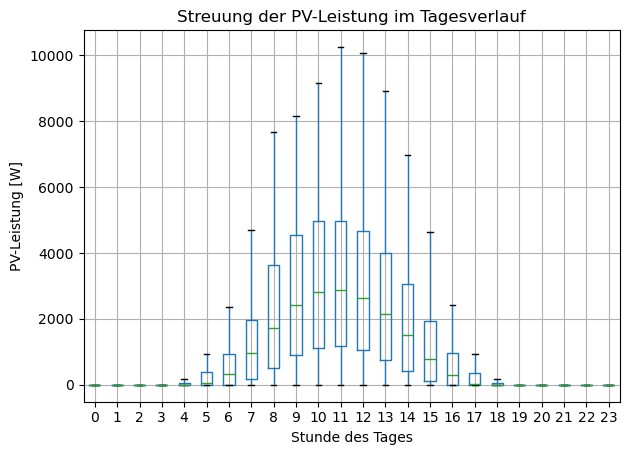

In [42]:


plt.figure(figsize=(10, 5))

df_all.boxplot(
    column="pv_power_w",
    by="hour",
    showfliers=False
)

plt.xlabel("Stunde des Tages")
plt.ylabel("PV-Leistung [W]")
plt.title("Streuung der PV-Leistung im Tagesverlauf")
plt.suptitle("")

plt.tight_layout()
plt.show()


